# ref 

- [그래프 머신러닝](https://product.kyobobook.co.kr/detail/S000200738068)

- [github](https://github.com/PacktPublishing/Graph-Machine-Learning)

# 단순무향그래프 $G=(V,E)$



- 노드(꼭지점)의 집합: $V=\{v_1,\dots,v_n\}$

- 두 노도 간의 연결 나타내는 간선(변): $E=\{(v_k,v_w),\dots,(v_i,v_j)\}$

- $E$의 각 원소는 순서쌍이며 각 간선 간에는 순서가 없다. $\to (v_k,v_w) = (v_w,v_k)$

- $|V|$:그래프의 위수(order)

- $|E|$: 그래프의 크기(size)

- 노드의 차수(degree): 해당 노드에 연결된 간선의 개수

- $v$의 근방(neighbor): $v$에 연결된 모든 노드 $V$의 부분집합

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
V={'D','P','M','R'}
E=[('M','A'),('M','P'),('P','D'),('M','R')]
G.add_nodes_from(V)
G.add_edges_from(E)

In [23]:
print(f"V={G.nodes}")
print(f"E={G.edges}")

V=['M', 'R', 'P', 'D', 'A']
E=[('M', 'A'), ('M', 'P'), ('M', 'R'), ('P', 'D')]


In [24]:
{G.degree(v): v for v in G.nodes}

{3: 'M', 1: 'A', 2: 'P'}

In [25]:
print(f"Graph Order위수: {G.number_of_nodes()}")
print(f"Graph Size크기: {G.number_of_edges()}")
print(f"Degree for nodes노드의 차수: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes근방노드: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order위수: 5
Graph Size크기: 4
Degree for nodes노드의 차수: {'M': 3, 'R': 1, 'P': 2, 'D': 1, 'A': 1}
Neighbors for nodes근방노드: {'M': ['A', 'P', 'R'], 'R': ['M'], 'P': ['M', 'D'], 'D': ['P'], 'A': ['M']}


In [26]:
ego_graph_milan = nx.ego_graph(G, "M")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['M', 'R', 'P', 'A']
Edges: [('M', 'A'), ('M', 'P'), ('M', 'R')]


In [27]:
# 새로운 노드나 간선 추가
new_nodes = {'L', 'M'}
new_edges = [('L','R'), ('M','P')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['M', 'R', 'P', 'D', 'A', 'L']
E = [('M', 'A'), ('M', 'P'), ('M', 'R'), ('R', 'L'), ('P', 'D')]


In [28]:
# 노드 삭제
node_remove = {'L', 'M'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['R', 'P', 'D', 'A']
E = [('P', 'D')]


In [29]:
# 간선 삭제
node_edges = [('M','D'), ('M','P')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['R', 'P', 'D', 'A']
E = [('P', 'D')]


In [31]:
print(nx.to_edgelist(G))
print(nx.to_pandas_adjacency(G))

[('P', 'D', {})]
     R    P    D    A
R  0.0  0.0  0.0  0.0
P  0.0  0.0  1.0  0.0
D  0.0  1.0  0.0  0.0
A  0.0  0.0  0.0  0.0


# 유향그래프 $G=(V,E)$



- 노드(꼭지점)의 집합: $V=\{v_1,\dots,v_n\}$

- 두 노도 간의 연결 나타내는 간선(변): $E=\{(v_k,v_w),\dots,(v_i,v_j)\}$

- $E$의 각 원소는 순서쌍이며 각 간선 간에는 순서가 있다. $\to (v_k,v_w) \neq (v_w,v_k)$

- 입력차수(indegree) $deg^-(v)$ : 노드 $v$로 도착하는 간선의 개수
 
- 출력차수(outdegree) $deg^+(v)$: 노드 $v$에서 출발하는 간선의 개수



# 다중그래프  $G=(V,E)$

- 한 노드에서 출발해서 같은 노드로 도착하는 간선이 여러 개인 다중 간선이 있는 그래프

- $V$: 노드의 집합, $E$: 간선의 다중집합

- 유향다중그래프: 순서쌍의 다중집합

- 무향다중그래프: 순서가 없는 경우

# 가중그래프

## 간선가중그래프 $G=(V,E,w)$

- $V$: 노드의 집합, $E$: 간선의 집합, $w: E \to \mathbb{R}$: 각 간선을 실수 $e \in E$ 가중값으로 대중시키는 가중함수

## 노드가중그래프 $G=(V,E,w)$

- $V$: 노드의 집합, $E$: 간선의 집합, $w: V \to \mathbb{R}$: 각 간선을 실수 $v \in V$ 가중값으로 대중시키는 가중함수

# 다분그래프(k분그래프)

- 노드를 각각 2개, 3개, k개의 노드 집합으로 분할할 수 있음

# 그래프신호 기본

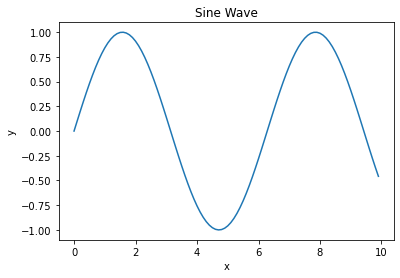

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# x축 값 생성
x = np.arange(0, 10, 0.1)

# y축 값 생성
y = np.sin(x)

# 그래프 그리기
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Wave')
plt.show()


# 그래프 클러스터링 기본

Cluster 0: frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
Cluster 1: frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21})
Cluster 2: frozenset({0, 16, 19, 4, 5, 6, 10, 11})


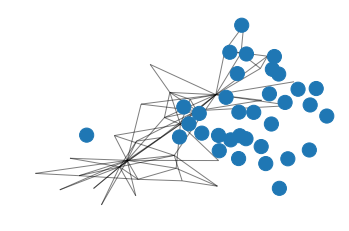

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 생성
G = nx.karate_club_graph()

# 클러스터링 수행
clusters = nx.algorithms.community.greedy_modularity_communities(G)

# 클러스터링 결과 출력
for i, c in enumerate(clusters):
    print(f"Cluster {i}: {c}")
    nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), nodelist=list(c), node_color=[i]*len(c), cmap=plt.cm.tab20, node_size=200)

nx.draw_networkx_edges(G, pos=nx.spring_layout(G), alpha=0.5)
plt.axis("off")
plt.show()


`-` 그래프 클러스터링 논문

`-` Newman, M. E. J., & Girvan, M. (2004). Finding and evaluating community structure in networks. Physical Review E, 69(2), 026113.
- 그래프의 모듈러리티(Modularity)를 최대화하는 방식으로 클러스터링을 수행
- Girvan-Newman 알고리즘

`-` Blondel, V. D., Guillaume, J.-L., Lambiotte, R., & Lefebvre, E. (2008). Fast unfolding of communities in large networks. Journal of Statistical Mechanics: Theory and Experiment, 2008(10), P10008.
- 그래프를 분할하는 방식으로 클러스터링을 수행

`-` Leskovec, J., Lang, K. J., & Mahoney, M. W. (2010). Empirical comparison of algorithms for network community detection. Proceedings of the 19th international conference on World wide web, 631-640.
- 여러 그래프 클러스터링 알고리즘을 비교하는 실험을 수행
- 그래프의 크기, 밀도, 구조 등에 따라 다양한 알고리즘이 잘 작동

`-` [Fortunato, S., & Hric, D. (2016). Community detection in networks: A user guide. Physics Reports, 659, 1-44.](https://reader.elsevier.com/reader/sd/pii/S0370157316302964?token=429F171A7EBCC1482C18F9AC5489B707188F66DC15E720E4800B66939EAB2460BE309A539046B4C2286F6D04F0AA7F54&originRegion=us-east-1&originCreation=20230331070121)
- 그래프 클러스터링의 기본 개념과 다양한 알고리즘을 상세히 설명하고, 이를 이용하여 실제 그래프에서의 클러스터링을 수행하는 방법을 제시


## 예제(k-means)

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [7]:
# 모델 생성 및 학습
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

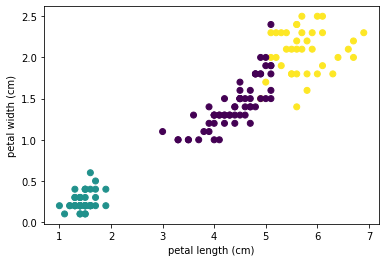

In [8]:
# 클러스터링 결과 시각화
df['cluster'] = kmeans.labels_
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['cluster'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

`-` ref: 
[출처] 클러스터링(Clustering)이란? 클러스터링 특징, 종류, 예제 실습|작성자 리르시